In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [42]:
imgHeight, imgWidth = 240, 496
batchSize = 20

trainDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/train/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)
validateDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/validation/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)
testDataSet = tf.keras.utils.image_dataset_from_directory(
    "../datasets/rubik-cube/test/",
    image_size = (imgHeight, imgWidth),
    batch_size = batchSize
)

Found 580 files belonging to 6 classes.
Found 24 files belonging to 6 classes.
Found 36 files belonging to 6 classes.


2023-05-30 18:15:13.906978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [580]
	 [[{{node Placeholder/_0}}]]
2023-05-30 18:15:13.907895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [580]
	 [[{{node Placeholder/_4}}]]


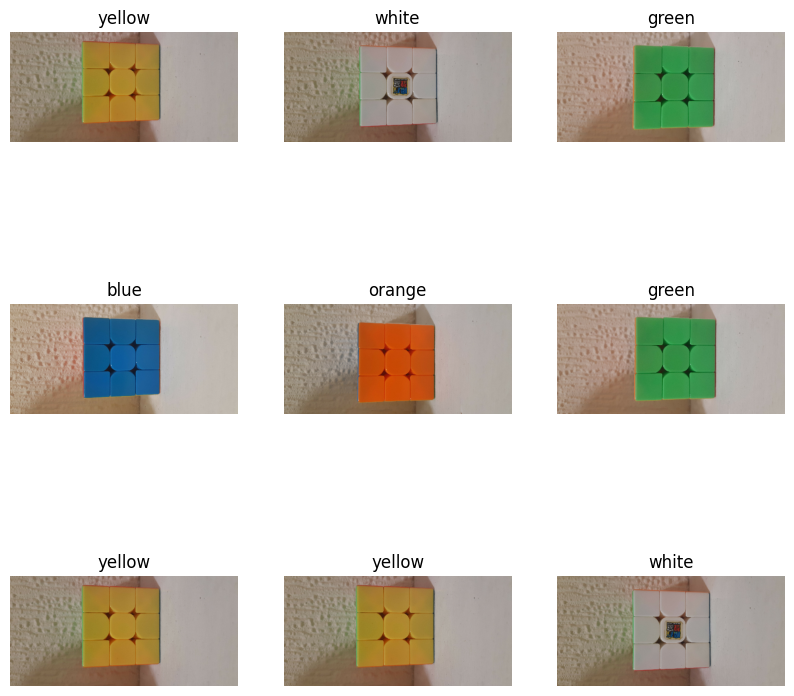

In [43]:
classNames = ["blue", "green", "orange", "red", "white", "yellow"]
plt.figure(figsize=(10, 10))
for images, labels in trainDataSet.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis("off")

In [44]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(6)
    ]
)

In [45]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [46]:
model.fit(
    trainDataSet,
    validation_data = validateDataSet,
    epochs = 10
)

Epoch 1/10


2023-05-30 18:15:19.426010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [580]
	 [[{{node Placeholder/_4}}]]
2023-05-30 18:15:19.426690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [580]
	 [[{{node Placeholder/_0}}]]


14/29 [=============>................] - ETA: 37s - loss: 1.1992 - accuracy: 0.5786

: 

: 